# Curly Vector
---
by Yitao LIU 2025-06 

mail: liuyitao97@outlook.com

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from curlyvector import curly_vector_plot, curly_vector_key

In [2]:
ds = xr.open_dataset('SampleData_curly_vector_NCEP_ltm_uv850hPa_JJA_AsiaMonsoon.nc')
lon = ds['lon'].values
lat = ds['lat'].values
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Convert xarray DataArrays to numpy arrays
u_data = ds['u'].values
v_data = ds['v'].values

# Subsample data for better visualization (every 3rd point)
step = 2
lon_sub = lon_grid[::step, ::step]
lat_sub = lat_grid[::step, ::step]
u_sub = u_data[::step, ::step]
v_sub = v_data[::step, ::step]

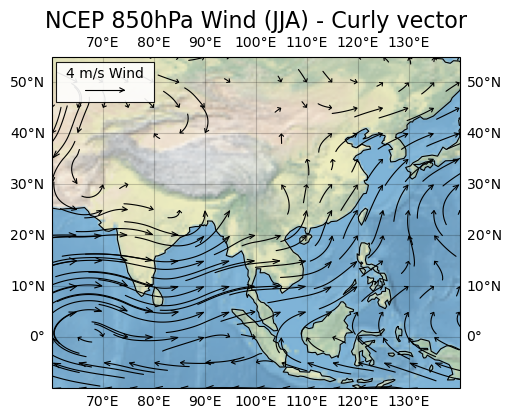

In [3]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_title('NCEP 850hPa Wind (JJA) - Curly vector', fontsize=16)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
# ax.add_feature(cfeature.OCEAN, alpha=0.3, color='lightblue')
# ax.add_feature(cfeature.LAND, alpha=0.3, color='lightgray')
ax.stock_img()
ax.set_extent([60, 140, -10, 55], crs=ccrs.PlateCarree())  # Set extent to focus on the region of interest
# ax.set_global()


params = {'head_length': 0.4, 'head_width': 0.08, 'linewidth': 0.8, 'scale': 2, 'color': 'k'}

# Plot curly vector with optimized parameters
curly_vector_plot(ax, lon_sub, lat_sub, u_sub, v_sub, 
                  transform=ccrs.PlateCarree(), 
                  **params)

# Add legend with proper parameters
curly_vector_key(ax, lon_sub, lat_sub, u_sub, v_sub, 
                 key_length=4, label='4 m/s Wind', 
                 loc=[0.08, 0.9], loc_coordinate='axes', 
                 box=True, box_size=1.5, spacing=10, 
                 **params)

# Add gridlines
ax.gridlines(draw_labels=True, color='k', alpha=0.2)

plt.savefig('curly_vector_NCEP_850hPa_JJA.png', dpi=200)
plt.show()